In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/forestfires.csv")

In [3]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
df=df.dropna()

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [7]:
label_encoder = LabelEncoder()
df['size_category'] = label_encoder.fit_transform(df['size_category'])
df.iloc[:,0:11]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [8]:
X = df.drop(['month', 'day', 'size_category'], axis=1)
y = df['size_category']

In [25]:
import matplotlib.pyplot as plt
nw=df[['size_category', 'area']]

In [26]:
nw.head()

,size_category,area
0,1,0.0
1,1,0.0
2,1,0.0
3,1,0.0
4,1,0.0


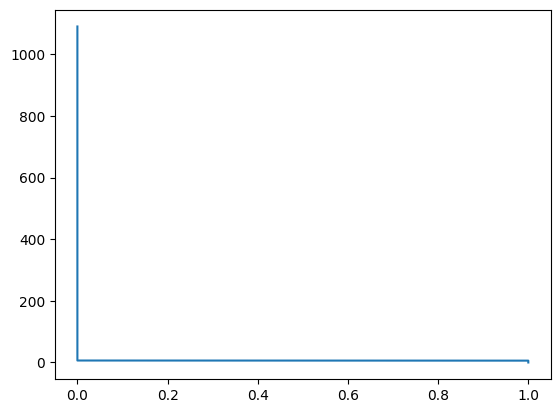

In [29]:
nw=nw.sort_values(by='area')
plt.plot(nw.size_category,nw.area)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}
svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [11]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy: 0.9855127828386717


In [12]:
best_params = {'kernel': 'linear', 'C': 0.1, 'gamma': 'scale'}
svm_model = SVC(**best_params)

In [13]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [17]:
# Initialize the SVM classifier
'''svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)'''

"svm_classifier = SVC(kernel='linear', C=1)\nsvm_classifier.fit(X_train, y_train)\ny_pred = svm_classifier.predict(X_test)"

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

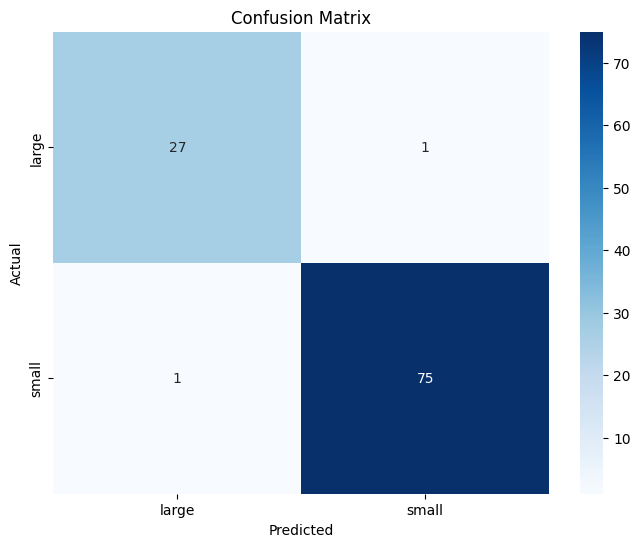

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1)


In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_model, X, y, cv=5)

In [34]:
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [1.         1.         0.99029126 0.97087379 0.99029126]
Mean Accuracy: 0.9902912621359224


In [35]:
a=df.iloc[:,0:11]
b=df.iloc[:,30:31]
c=pd.concat([a, b], axis=1)

<ipython-input-52-51345d3af2f4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(c.corr(), annot=True, cmap='coolwarm')


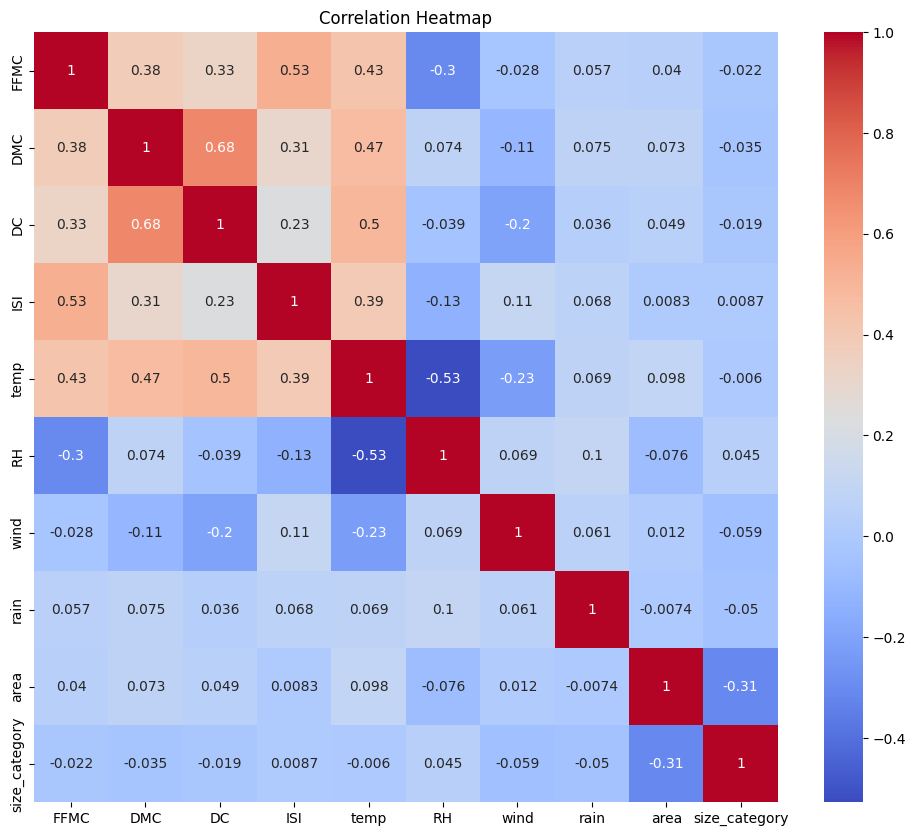

In [52]:
# Visualization 2: Correlation Heatmap
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(c.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [53]:
'''from the heatmap we can see the correlation between different variable, especally between the target variable 'size_category'
and other feature variables. There is considerabe corellation between RH and temperature'''

"from the heatmap we can see the correlation between different variable, especally between the target variable 'size_category'\nand other feature variables. There is considerabe corellation between RH and temperature"

<ipython-input-54-8494764df508>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='size_category', data=df, palette='viridis')


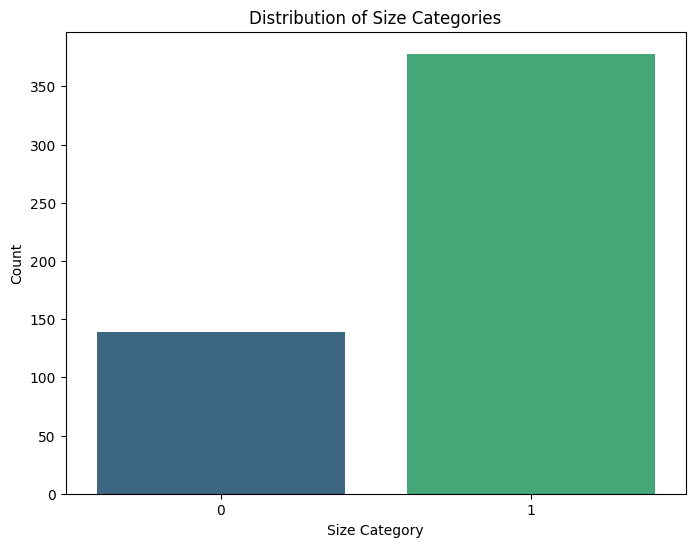

In [54]:
#Distribution of Size Categories
plt.figure(figsize=(8, 6))
sns.countplot(x='size_category', data=df, palette='viridis')
plt.title('Distribution of Size Categories')
plt.xlabel('Size Category')
plt.ylabel('Count')
plt.show()

In [55]:
'''There are two categories in size, 0 and 1 after we applied lable encoding. We can see that the category 1 is significantly
larger than category 0'''

'There are two categories in size, 0 and 1 after we applied lable encoding. We can see that the category 1 is significantly \nlarger than category 0'

In [37]:
c.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.731141
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.443796
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,1.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000


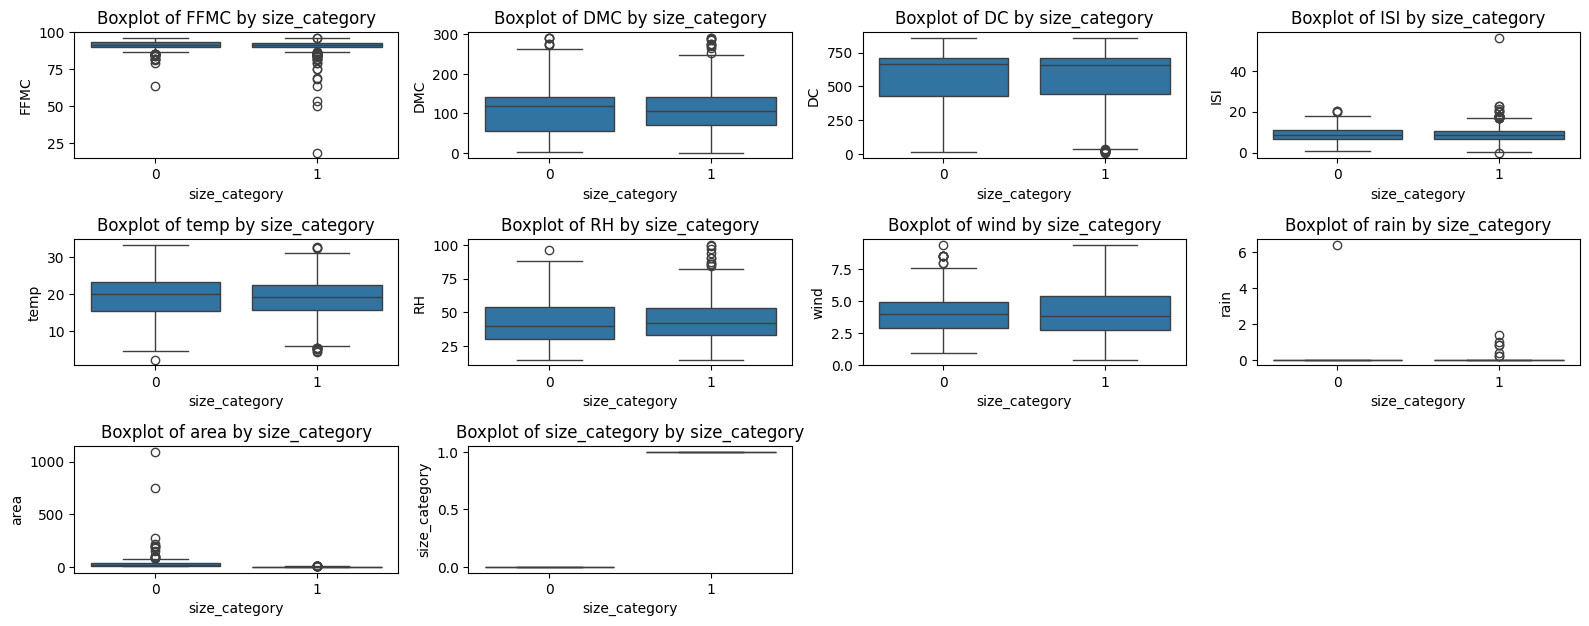

In [58]:
target_variable = 'size_category'
numerical_columns = c.select_dtypes(include=['float64', 'int64']).columns
# Boxplot to detect outliers
plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=c[target_variable], y=c[col], showfliers=True)
    plt.title(f'Boxplot of {col} by {target_variable}')

plt.tight_layout()
plt.show()

In [ ]:
'''In the box plots above, we can see the outliers of the feature variable represented with respect to the target variable size category.
The outliers of the feature on each category (0 and 1) is visible in the plot. The FFMC by size_category plot, has quite a bit of outliers
as is represented by the circled marks beyond its lower wisker. Similarly, we can understand the spread of outliers of each feature variable
from the box plots above'''